In [1]:
import fns
from fns import *
from fns.functionsTF import *
%matplotlib notebook
from tqdm import tnrange, tqdm_notebook
from joblib import Parallel, delayed


today = datetime.date.today()
todayStr = '%04d%02d%02d' % (today.year, today.month, today.day)
# todayStr = '20151005'
DIRECTORY = os.path.expanduser("~/Dropbox/0000_PhD/figures/"+todayStr+"/")
CSV_DIR_TODAY = os.path.expanduser("~/Dropbox/0000_PhD/csv/"+todayStr+"/")
CSV_DIR = os.path.expanduser("~/Dropbox/0000_PhD/csv/")
FIG_DIR = os.path.expanduser("~/Dropbox/0000_PhD/figures/")
if not os.path.exists(DIRECTORY):
    os.makedirs(DIRECTORY)
    
from bokeh.io import output_notebook
output_notebook()
from IPython.display import clear_output, Image, display

********************************************************************************
functionsTF loaded!
********************************************************************************
10 8 2


Loading BokehJS ...

In [2]:
PAPER = os.path.expanduser('~/Dropbox/ICL-2014/Presentations/2016-10-11-GJ-sync-paper/figures/')

In [3]:
plt.style.use(['seaborn-paper'])
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})


In [49]:
i=0
params = []
N = 1000
FACT = 50
T = 50000
spm = False
g = 3
ratio = 3
IAF = True
WII = -1000
WIE = -2000
WEE = 1000
WEI = 1000
inE = 100
k = 4

# for nu in range(0, 100, 20):
#     for step in [10,20,50,70]:
#         i+=1
#         params.append([T, FACT, N, g, i, nu, ratio, inE, WII, k, step])

nu=40
step=70
tauv = 15
IAF = True
spm = True
ratioNI = 0.2
NI = int(N*ratioNI)

filename = "../data/stimulations/stimulation5-tauv-%d_g-%d_N-%d_T-%d_nu-%d_ratio-%.2f_WEE-%d_WEI-%d_WIE-%d_WII-%d_FACT-%d_rNI-%.2f_k-%d_IAF-%d_inE-%d_step-%d"\
               % (tauv, g, N, T, nu, ratio,  WEE, WEI, WIE, WII, FACT, ratioNI, k, IAF*1, inE, step)
a = np.load(filename)

filename = "../data/stimulations/raster_stimulation5-tauv-%d_g-%d_N-%d_T-%d_nu-%d_ratio-%.2f_WEE-%d_WEI-%d_WIE-%d_WII-%d_FACT-%d_rNI-%.2f_k-%d_IAF-%d_inE-%d_step-%d"\
               % (tauv, g, N, T, nu, ratio,  WEE, WEI, WIE, WII, FACT, ratioNI, k, IAF*1, inE, step)
r = np.load(filename)
    


In [50]:
def f(w=15,h=4):
    plt.figure(figsize=(w,h), linewidth=0.01)

<IPython.core.display.Javascript object>


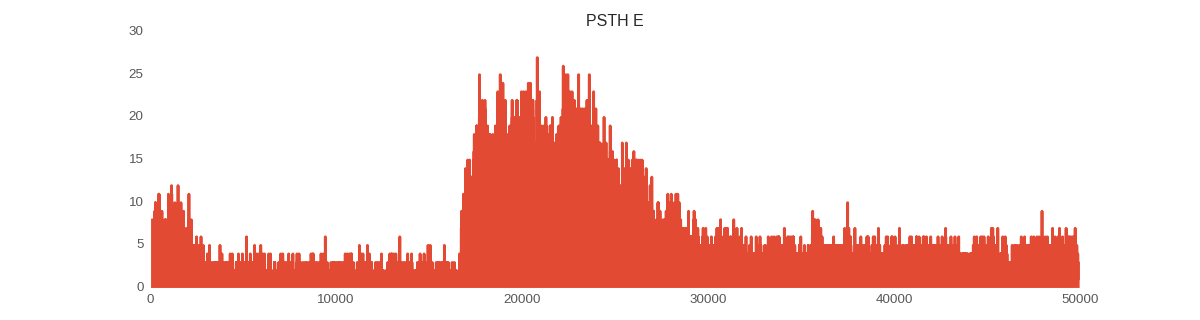

<IPython.core.display.Javascript object>


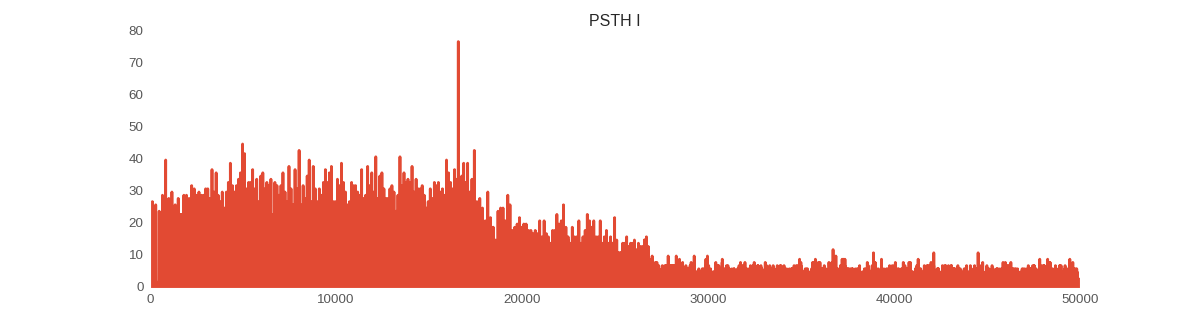

<IPython.core.display.Javascript object>


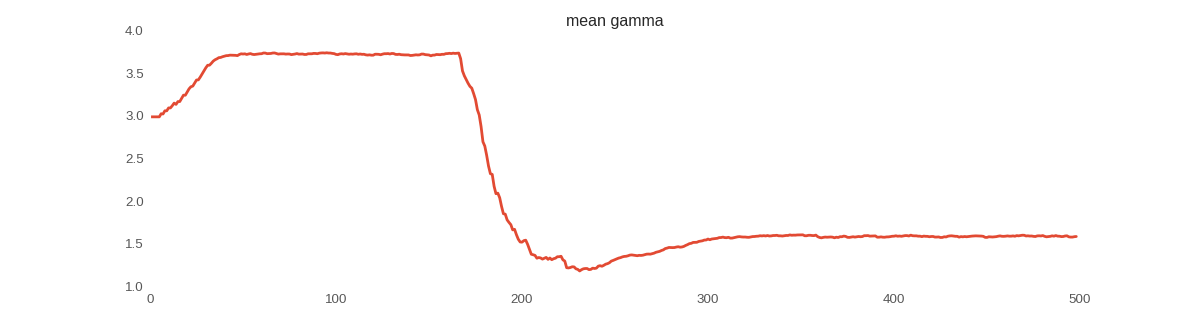

<IPython.core.display.Javascript object>


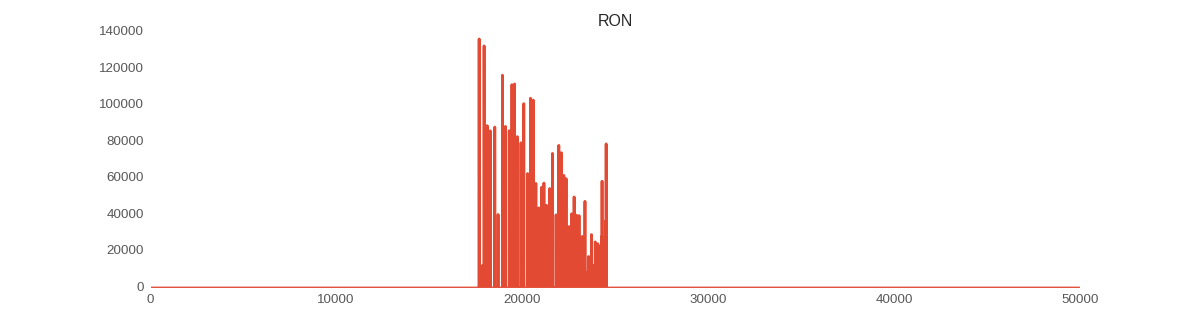

<IPython.core.display.Javascript object>


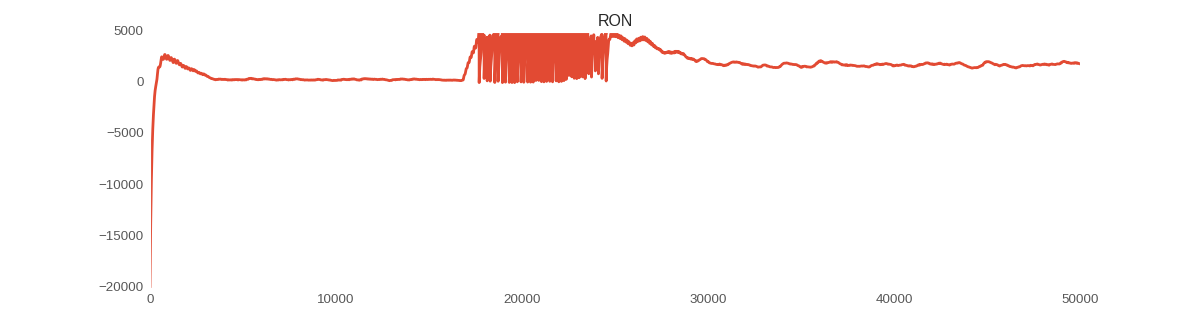

In [51]:
f()
plt.plot(a['vvmE'][100:])
plt.title('PSTH E')

f()
plt.plot(a['vvmI'][100:])
plt.title('PSTH I')

f()
plt.plot(a['gamma'][:-2]*NI)
plt.title('mean gamma')

f()
plt.plot(a['vvmERon'][:-2]*NI)
plt.title('RON')

f()
plt.plot(a['vmERon'][:-2]*NI)
plt.title('RON')
# # plt.figure()
# # plt.plot(gpu.input)
# # plt.title('Input current')

# t0 = T//3 - 1000
# t1 = T//3 + 1000

# f()
# plt.plot(a['vvmE'][t0:t1])
# plt.title('PSTH E')

# f()
# plt.plot(a['vvmI'][t0:t1])
# plt.title('PSTH I')

# f()
# plt.plot(a['gamma'][t0//100:t1//100])
# plt.title('mean gamma')
# plt.figure()
# plt.plot(np.mean(np.array(gpu.lowsp).reshape(T,N).transpose(), axis=0))

In [107]:
def plotRaster(r):
    a = 17
    b = 3
    x,y = convertRaster(r.transpose())
    aspect = b/a
    fig  = plt.figure(figsize=(a,b))
    ax = fig.add_subplot(111)
    # ax.imshow(gpu1.raster[100:1100].transpose(), aspect=aspect)
    ax.plot(x,y, '.', color='black', alpha=1)

(200, 10000)


<IPython.core.display.Javascript object>


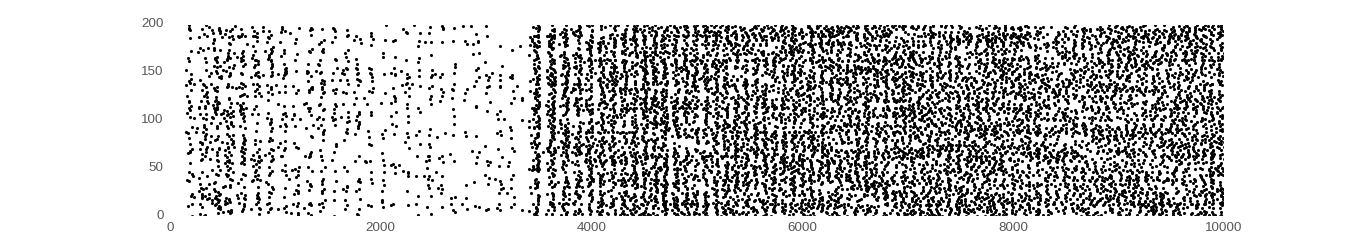

In [108]:
print(r.shape)
plotRaster(r[:,:].T)

In [109]:
def xax(gamma, duration):
    x= np.arange(0,(duration)/1000,(duration)/1000/len(gamma) )
    return x

def readPSTH( N, r, G, S, it,
             binsize, d1, d2,
             d3, before, after,
             s, WII, LTP, LTD, model, coeff, RON='izh', tau_m=10):
    gr = GRAPH()
    listSSP1 = Parallel(n_jobs=num_cores)(delayed(cortex.readSimulationSSP1)(N, r,i,G,S,
                                                                           d1, d2, d3, before, after,
                                                                           WII, LTP, LTD, model) for i in range(it))
    if RON == 'izh':
        listS = Parallel(n_jobs=num_cores)(delayed(gr.readoutSpikes)(ssp1, coeff, tau_m) for ssp1 in listSSP1)
    else:
        listS = Parallel(n_jobs=num_cores)(delayed(readoutSpikesIAF)(ssp1, coeff, tau_m) for ssp1 in listSSP1)

    tot = np.sum(listS, axis=0)
    totSSP1 = np.sum(listSSP1, axis=0)
    total = np.sum(listS)
    h = cortex.getHist(tot,binsize)
    hSSP1 = cortex.getHist(totSSP1,binsize)
    spikes_x, spikes_y, spikes_x_tc, spikes_y_tc, gamma, correlation, ssp1, stimulation,p,q,lowsp,vm = gr.readSimulation(N,r,0,G,S, d1, d2, d3, before, after, WII, LTP, LTD, model)

    return h, stimulation, total, hSSP1

def plotPTSH( fig, before, after,binsize, h, s, it, DIRECTORY, S, N):
    T = before+after
    simsize=T/0.25
    x2 = np.arange(0,(simsize/4-1)/1000, (simsize/len(s)/4)/1000)

    # fig = plt.figure(figsize=(9,5))
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])
    ax0 = plt.subplot(gs[0])
    # ax0.set_ylim([0,10])
    print(np.arange(0,simsize/1000-binsize/1000,simsize/len(h)/1000).shape)
    print(np.array(h).shape)
    print(binsize/1000)
    ax0.bar(np.arange(0,simsize/1000-binsize/1000,simsize/len(h)/1000),np.array(h)/it, binsize/1000)

    ax0.set_title('PSTH - Input: %s' % S)
    ax0.set_xticks([])

    # plot stimulation s
    ax = plt.subplot(gs[1])
    ax.set_ylim([30,110])
    ax.set_yticks([30,100])
    ax.set_xlabel('Time [s]')
    plt.plot(x2,s)
    plt.tight_layout()
    extension = "_S-%d_N-%d_T-%d" % (S, N, T)
    print(DIRECTORY + extension + '_PTSH.pdf')
    plt.savefig(DIRECTORY + extension + '_PTSH.pdf')
    
def readoutSpikesIAF( ssp1, W, sigma, tau_m=10):
    ## setup parameters and state variables
    T   = len(ssp1)/4             # total time to simulate (msec)
    dt      = 0.25               # simulation time step (msec)
    time    = np.arange(0, T, dt) # time array
    t_rest  = 0                   # initial refractory time

    ## LIF properties
    Vm      = np.zeros(len(time))    # potential (V) trace over time
    spikes  = np.zeros(len(time))
    np.random.seed(None) # for joblib otherwise, take the same RandomState
    Rm      = W*np.random.lognormal(3, sigma )                 # resistance (kOhm)
#     Rm = W
    Cm      = 7                  # capacitance (uF)
    tau_m   = tau_m               # time constant (msec)
    tau_ref = 4                   # refractory period (msec)
    Vth     = 1                   # spike threshold (V)
    V_spike = 0.5                 # spike delta (V)

    ## Stimulus
    I       = ssp1                 # input current (A)     
    ## iterate over each time step
    for i, t in enumerate(time):
        if t > t_rest:
            Vm[i] = Vm[i-1] + (-Vm[i-1] + I[i]*Rm) / tau_m * dt
        if Vm[i] >= Vth:
            Vm[i] += V_spike
            t_rest = t + tau_ref
    # plt.plot(Vm)
    spikes = Vm>1.4
        
    return spikes

def ron_net(ssp1, W, var, N,  tau_m=10, model=""):
    T   = len(ssp1)/4             # total time to simulate (msec)
    dt      = 0.25                # simulation time step (msec)
    time    = np.arange(0, T, dt) # time array
    spikes  = np.zeros(len(time))
    if model=="aEIF":
        sp = Parallel(n_jobs=num_cores)(delayed(aEIF)(ssp1, W, var,tau_m) for k in range(N))
    elif model == "IAF":
        sp = Parallel(n_jobs=num_cores)(delayed(readoutSpikesIAF)(ssp1, W, var,tau_m) for k in range(N))
    else:
        sp = Parallel(n_jobs=num_cores)(delayed(readoutSpikesIAF)(ssp1, W, var,tau_m) for k in range(N))

    spikes = np.sum(sp,axis=0)
#     print(spikes.shape)
    return spikes

def plotIAF( ssp1, W,sigma, tau_m=40):
    ## setup parameters and state variables
    T   = len(ssp1)/4             # total time to simulate (msec)
    dt      = 0.25               # simulation time step (msec)
    time    = np.arange(0, T, dt) # time array
    t_rest  = 0                   # initial refractory time

    ## LIF properties
    Vm      = np.zeros(len(time))    # potential (V) trace over time
    spikes  = np.zeros(len(time))
    Rm      = W*np.random.lognormal(3, sigma )                  # resistance (kOhm)
    Cm      = 7                  # capacitance (uF)
    tau_m   = tau_m               # time constant (msec)
    tau_ref = 4                   # refractory period (msec)
    Vth     = 1                   # spike threshold (V)
    V_spike = 0.5                 # spike delta (V)
    print(Rm)
    ## Stimulus
    I       = ssp1                 # input current (A)     
    ## iterate over each time step
    for i, t in enumerate(time):
        if t > t_rest:
            Vm[i] = Vm[i-1] + (-Vm[i-1] + I[i]*Rm) / tau_m * dt
        if Vm[i] >= Vth:
            Vm[i] += V_spike
            t_rest = t + tau_ref
    plt.plot(Vm)
    
def aEIF( ssp1, W,sigma, tau_m=40):
    
    T   = len(ssp1)/4             # total time to simulate (msec)
    dt      = 0.25               # simulation time step (msec)
    time    = np.arange(0, T, dt) # time array
    t_rest  = 0                   # initial refractory time
    spikes  = np.zeros(len(time))
    Vm      = np.zeros(len(time)) 
    np.random.seed(None) # for joblib otherwise, take the same RandomState
    Rm      = W*np.random.lognormal(3, sigma )                 # resistance (kOhm)
    refrac  =5/dt
    Delta_T = 0.5
    ref = 0
    c_m = 40
    g_m = 1
    alpha_w = -2
    beta_ad = 15.5
    ad = 0
    tau_ad = 10
    I = ssp1
    vt = 10
    for i, t in enumerate(time):       
        Vm[i]= Vm[i-1]+(ref>refrac)*(dt/c_m*(-g_m*Vm[i-1]+ g_m*Delta_T*np.exp((Vm[i-1]-vt)/Delta_T) +alpha_w*ad +Rm*I[i]))# aEIF neuron model
        ad = ad + (ref>refrac)*(dt/tau_ad*(-ad+beta_ad*Vm[i-1]))# adaptation variable
        vv =(Vm[i]>=vt)# spike if voltage crosses the threshold
        ref = ref*(1-vv)+1 # update of the refractory period
        ad = ad+vv*(30) # spike-triggered adaptation
        spikes[i] = Vm[i]>vt
        Vm[i] = (Vm[i]<vt)*Vm[i] # reset after spike
        
    return spikes
    
def findIndex2(spikes_x,val):
    res = (spikes_x-val).argmin()
    return res

def izhRS(ssp1, W,sigma, tau_m=40):
    T   = len(ssp1)/4             # total time to simulate (msec)
    dt      = 0.25               # simulation time step (msec)
    time    = np.arange(0, T, dt) # time array
    t_rest  = 0                   # initial refractory time
    spikes  = np.zeros(len(time))
    v       = np.zeros(len(time)) 
    u = 0 
    Rm = W
    I = ssp1
    
    for i, t in enumerate(time):
        v[i] += dt/40 * ( 0.7*(v[i-1]+60)*(v[i-1]+40) - u + Rm*I[i])
        u += dt * 0.005 * (-4* (v[i-1] +60) - u)
        if v[i]>35:
            spikes[i]=1
            v[i] = -50
            u += 100
    
    return spikes

In [120]:
num_cores=8
# ron = ron_net(a['vvmE'], 0.5, 0.2, 200, 10, model="aEIF")
ron = ron_net(a['vvmE'], 0.007, 0.2, 1000, 10, model="IAF")

<IPython.core.display.Javascript object>


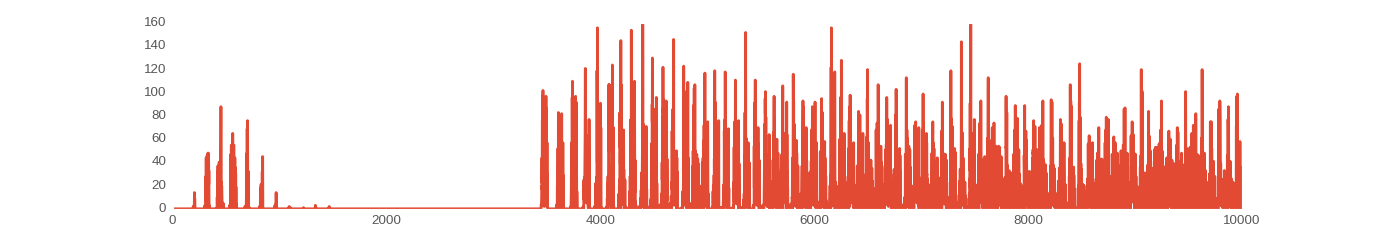

In [128]:
f(10,3)
plt.plot(ron)